In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_context('paper')
sns.set_style('whitegrid')
from matplotlib import style
style.use('dark_background')

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

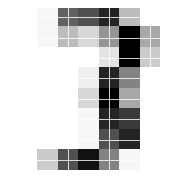

In [4]:
n = np.random.randint(0, 1797)
plt.figure(figsize=(3,3))
plt.imshow(digits.data[n,:].reshape(8,8), cmap='Greys')

In [5]:
from sklearn.cluster import KMeans

In [6]:
kmeans = KMeans(n_clusters=10, random_state=0)

In [7]:
kmeans.fit(digits.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [8]:
kmeans.labels_, kmeans.labels_.shape

(array([5, 7, 7, ..., 7, 3, 3]), (1797,))

In [9]:
kmeans.cluster_centers_.shape

(10, 64)

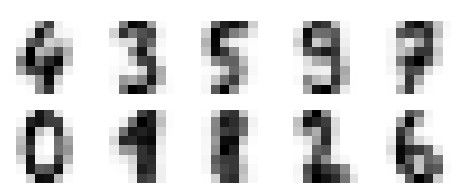

In [10]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for i, (axi, center) in enumerate(zip(ax.flat, centers)):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, cmap='Greys')
    axi.set_title(i)

In [11]:
from scipy.stats import mode

In [12]:
labels = np.zeros_like(kmeans.labels_)
for i in range(10):
    mask = (kmeans.labels_ == i)
    labels[mask] = mode(digits.target[mask])[0]

Predicted Value 2


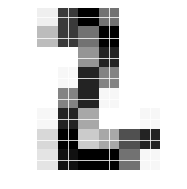

In [13]:
n = np.random.randint(0, 1797)
plt.figure(figsize=(3,3))
plt.imshow(digits.data[n,:].reshape(8,8), cmap='Greys')
print('Predicted Value', labels[n])

In [14]:
from sklearn.metrics import accuracy_score, classification_report

In [15]:
accuracy_score(digits.target, labels)

0.7935447968836951

In [16]:
print(classification_report(digits.target, labels))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       178
          1       0.61      0.30      0.40       182
          2       0.85      0.84      0.84       177
          3       0.88      0.84      0.86       183
          4       0.98      0.90      0.94       181
          5       0.91      0.75      0.82       182
          6       0.97      0.98      0.98       181
          7       0.86      0.99      0.92       179
          8       0.45      0.57      0.50       174
          9       0.56      0.77      0.65       180

avg / total       0.81      0.79      0.79      1797



In [17]:
from sklearn.manifold import Isomap, TSNE

In [18]:
tsne = TSNE(n_components=2, init='random', random_state=0)

In [19]:
tsne_proj = tsne.fit_transform(digits.data)

In [20]:
kmeans = KMeans(n_clusters=10, random_state=0)

In [21]:
kmeans.fit(tsne_proj)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [23]:
labels = np.zeros_like(kmeans.labels_)
for i in range(10):
    mask = (kmeans.labels_ == i)
    k = mode(digits.target[mask])[0]
    labels[mask] = k[0]

In [24]:
accuracy_score(digits.target, labels)

0.9326655537006121

In [25]:
print(classification_report(digits.target, labels))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       178
          1       0.86      0.75      0.80       182
          2       0.84      0.94      0.89       177
          3       0.99      0.92      0.95       183
          4       1.00      0.98      0.99       181
          5       0.98      0.98      0.98       182
          6       0.99      1.00      1.00       181
          7       0.92      1.00      0.96       179
          8       0.80      0.96      0.87       174
          9       0.99      0.79      0.88       180

avg / total       0.94      0.93      0.93      1797



In [26]:
tsne_proj.shape

(1797, 2)

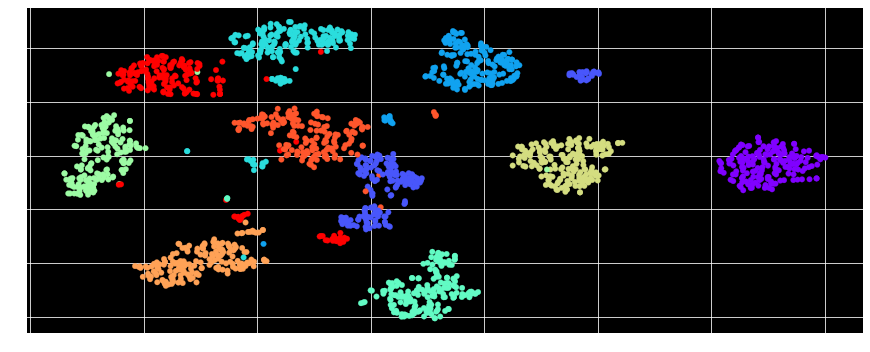

In [27]:
plt.figure(figsize=(15,6))
plt.scatter(tsne_proj[:,0], tsne_proj[:,1], c=digits.target, cmap='rainbow')

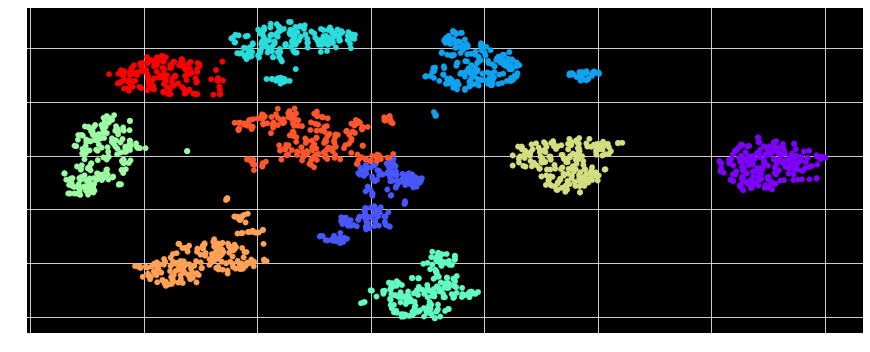

In [28]:
plt.figure(figsize=(15,6))
plt.scatter(tsne_proj[:,0], tsne_proj[:,1], c=labels, cmap='rainbow')

In [29]:
iso = Isomap(n_neighbors=20, n_components=2)

In [30]:
iso_proj = iso.fit_transform(digits.data)

In [31]:
kmeans = KMeans(n_clusters=10, random_state=0)

In [32]:
clusters = kmeans.fit_predict(iso_proj)

In [33]:
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [34]:
accuracy_score(digits.target, labels)

0.6878130217028381

In [35]:
print(classification_report(digits.target, labels))

             precision    recall  f1-score   support

          0       0.81      0.87      0.83       178
          1       0.54      0.68      0.60       182
          2       0.70      0.62      0.65       177
          3       0.42      0.47      0.44       183
          4       0.99      0.94      0.97       181
          5       0.68      0.40      0.50       182
          6       0.79      0.73      0.76       181
          7       0.95      0.97      0.96       179
          8       0.52      0.48      0.50       174
          9       0.58      0.72      0.64       180

avg / total       0.70      0.69      0.69      1797



In [37]:
iso_proj.shape

(1797, 2)

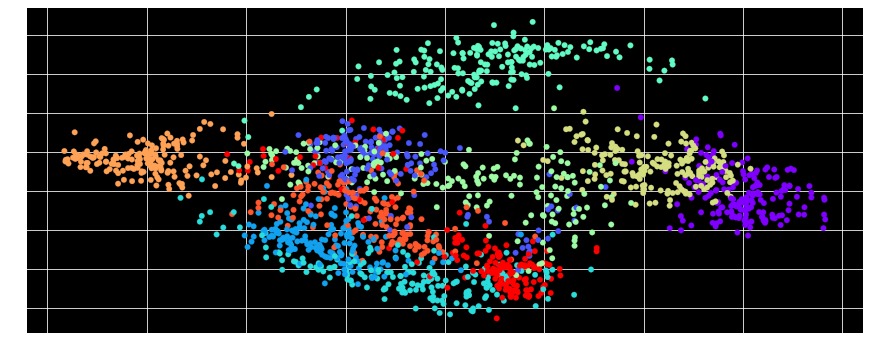

In [38]:
plt.figure(figsize=(15,6))
plt.scatter(iso_proj[:,0], iso_proj[:,1], c=digits.target, cmap='rainbow')

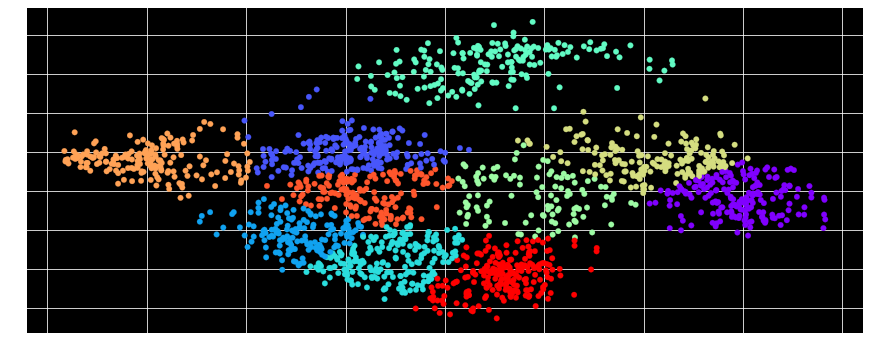

In [39]:
plt.figure(figsize=(15,6))
plt.scatter(iso_proj[:,0], iso_proj[:,1], c=labels, cmap='rainbow')